Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/gold-price-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'gold-price-data' dataset.
Path to dataset files: /kaggle/input/gold-price-data


Data Collection and Processing

In [6]:
# loading the csv data to panda dataframe
gold_data = pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')

In [7]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
# print the last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
# no of rows and columns
gold_data.shape

(2290, 6)

In [10]:
#getting some basic info of data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# checking the no of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [12]:
# statistical measures of data
gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

*   Positive Correlation
*   Negtive Correlation




In [26]:
X = gold_data.drop('Date', axis=1)
correlation = X.corr()

<Axes: >

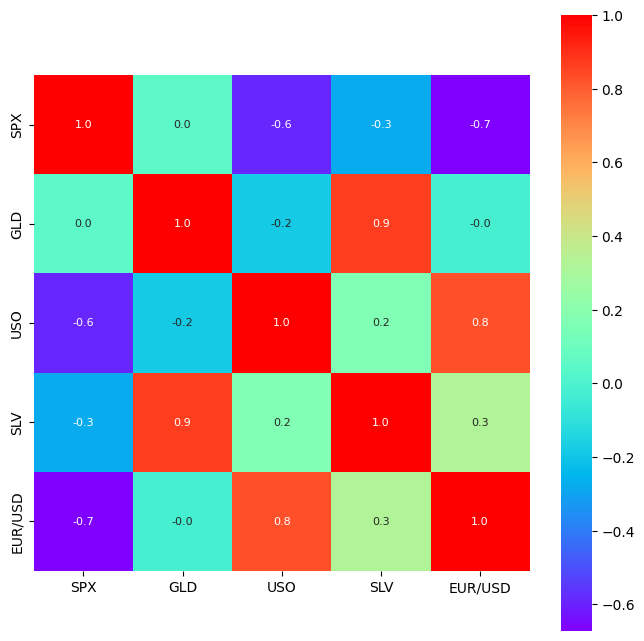

In [17]:
# construting a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='rainbow')
#

In [18]:
# correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-3017478376.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

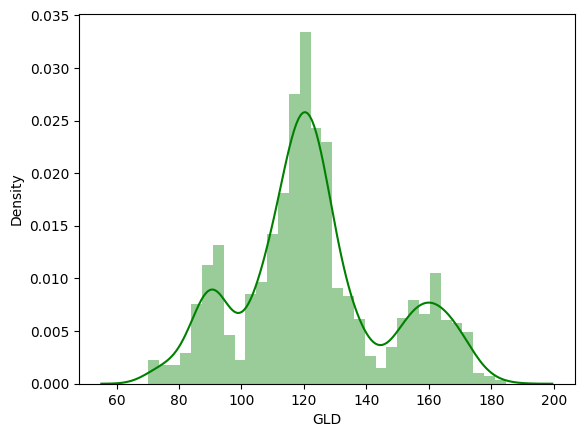

In [19]:
# checking the distribution of the gold price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [22]:
Y = gold_data['GLD']

In [27]:
print(X)

              SPX         GLD        USO      SLV   EUR/USD
0     1447.160034   84.860001  78.470001  15.1800  1.471692
1     1447.160034   85.570000  78.370003  15.2850  1.474491
2     1411.630005   85.129997  77.309998  15.1670  1.475492
3     1416.180054   84.769997  75.500000  15.0530  1.468299
4     1390.189941   86.779999  76.059998  15.5900  1.557099
...           ...         ...        ...      ...       ...
2285  2671.919922  124.589996  14.060000  15.5100  1.186789
2286  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 5 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Test Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

Model Training : Random Forest Regressor

In [29]:
RegressorMixing = RandomForestRegressor(n_estimators=100)

In [31]:
# Trainig the model
RegressorMixing.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [32]:
# prediction on Test Data
test_data_prediction = RegressorMixing.predict(X_test)

In [33]:
print(test_data_prediction)

[162.02220178 127.59869881 124.56109838 118.95510051 125.71970043
  85.05569842 171.44400074 155.30349863 108.07590237 130.41679935
 119.80100093 124.58969817 142.39099992 105.63250025  80.76789942
 123.71660202 139.24320004  88.2900998   92.32739814 127.84159762
 126.30229861 149.82310321 117.73020162 154.65880046 130.39809771
 130.49349914 119.76350095 112.01609952 170.95440051 157.72309966
 126.23379978 153.0332998  128.80889842 122.89729823 116.0136998
 155.37689965 116.03539978 121.12969827 104.78950069 107.73539936
 133.49629902  84.86349911 159.2738008  121.2451987  122.97879946
 156.29759951 119.67390014 116.06980004 169.65789922 116.11510172
 135.20360053 161.99289914 159.52089712 151.66149841 124.38789998
 115.79280056 167.59119987 115.53090182 165.7565009   84.32349951
 122.12929987 122.04920042 119.33599836 172.26619908 119.3970989
 181.46589511 160.62569654 135.0756012  114.72300044  93.12449764
 172.20649954 117.75319983 118.51919782 124.79049913 145.73280162
  91.1802993

In [34]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9999768829754432


comparing the actual values and predicted values

In [35]:
Y_test = list(Y_test)

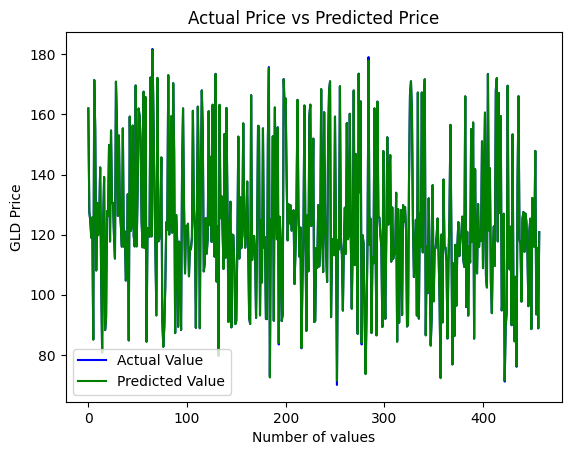

In [36]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()